# Milestone (Process and Tools) - Data Model Final
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

### Instructions
Specifically, you’ll need to pick two (or more) classifiers and perform each one of the following tasks, in order:

1. Split your dataset into training and testing sets
2. Train your classifiers, using the training set partition
3. Apply your (trained) classifiers on the test set
4. Measure each classifier’s performance using at least 3 of the metrics we covered in this course (one of them has to be the ROC-based one). At one point, you’ll need to create a confusion matrix.
5. Document your results and your conclusions, along with any relevant comments about your work

Make sure that you state any assumptions you make (e.g. the parameters you use for the classifiers) in your report. Also, for this assignment you’ll need to provide your Python code, along with comments to show what each part of the script does. For additional traction with this material, you can examine how the performance of the winning classifier changes if you bin one of the variables you’ve used (you’ll need to binarize the binned variable after you create it).

Note: if you have a multi-class problem, you can focus on a particular class, when evaluating your classifier. This way, you can simplify the problem and turn it into a binary one (class 1 = class you are focusing on, class 0 = any other class). This will enable you to use a confusion matrix for your evaluation of the classifier.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib

import warnings

warnings.filterwarnings("ignore") # To suppress warning for violin plots when python version is < 3.7

%matplotlib inline

In [2]:
# Adult Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
Adults = pd.read_csv(url, header=None)

# Find proper column names here:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Adults.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
               'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain',
               'capital-loss', 'hours-per-week', 'native-country', 'income']

# Turn off warning generated from 'Chained assignment' (https://www.dataquest.io/blog/settingwithcopywarning/)
pd.set_option('mode.chained_assignment', None)

# Declare Functions

In [3]:
# Function to replace outliers
def replace_outlier(array):
    # The high limit for acceptable values is the mean plus 2 standard deviations 
    LimitHi = np.mean(array) + 2*np.std(array)
    # The low limit for acceptable values is the mean plus 2 standard deviations
    LimitLo = np.mean(array) - 2*np.std(array)
    #  Create Flag for values outside limits 
    FlagBad = (array < LimitLo) | (array > LimitHi)
    
    # FlagGood is the complement of FlagBad
    FlagGood = ~FlagBad
    # Replace outleiers with the mean of non-outliers
    array[FlagBad] = np.mean(array[FlagGood])
    # Return array result
    return array

In [4]:
# Function to replace missing numeric values
def replace_missing_value(x, col):
    # We determine the locations of the question marks
    QuestionMark = x.loc[:, col].astype(str) == "?"
    # If there are question marks
    if sum(QuestionMark) > 0:
        # Convert the current column to numeric data including nans
        x.loc[:, col] = pd.to_numeric(x, errors='coerce')
        # Get the Nan array from the current column
        HasNan = np.isnan(x.loc[:, col]) 
        # Calculate the Median for current column without Nan
        Median = np.nanmedian(x.loc[:, col])
        # Replace the missing value with Median
        x.loc[HasNan, col] = Median
    return x.loc[:, col]

In [5]:
# Function to bin the data
def bin(x, b): # x = data array, b = boundaries array
    nb = len(b)
    N = len(x)
    y = np.empty(N, float) # empty float array to store the bin numbers (output)
    
    for i in range(1, nb): # repeat for each pair of bin boundaries
        y[(x >= b[i-1])&(x < b[i])] = i
    
    y[x == b[-1]] = nb - 1 # ensure that the borderline cases are also binned appropriately 
    # (Negative numbers mean that you count from the right instead of the left. So, list[-1] refers to the last element)
    return y

# Code


Determine Model Accuracy

sklearn accurate split:
Test size should have been  10854.0 ; and is:  10854

Use logistic regression to predict if the person make >50K per year from other variables in Adults with non-binarized columns

Confusion Matrix and Metrics of Class 1: income>50K = true and Class 2 : income>50K = false with non-binarized columns
Probability Threshold is chosen to be: 0.5
Confusion Matrix:
[[8032  218]
 [1746  858]]
TP, TN, FP, FN: 858 , 8032 , 218 , 1746
Accuracy rate: 0.82
Precision: 0.8
Recall: 0.33
F1 score: 0.47


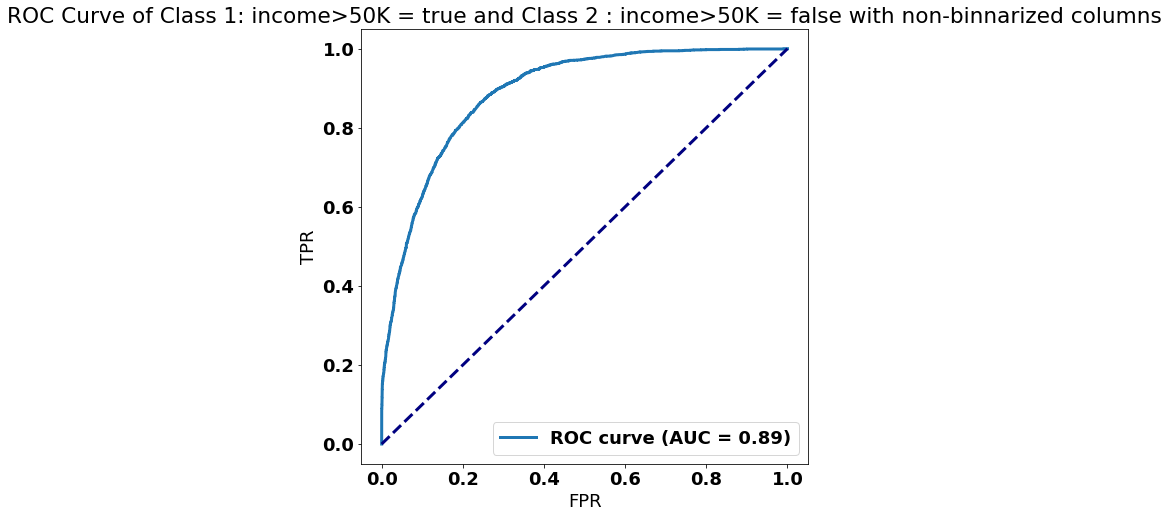


Use logistic regression to predict if the person make >50K per year from other variables in Adults with binarized columns

Confusion Matrix and Metrics of Class 1: income>50K = true and Class 2 : income>50K = false with binarized columns
Probability Threshold is chosen to be: 0.5
Confusion Matrix:
[[8088  162]
 [1809  795]]
TP, TN, FP, FN: 795 , 8088 , 162 , 1809
Accuracy rate: 0.82
Precision: 0.83
Recall: 0.31
F1 score: 0.45


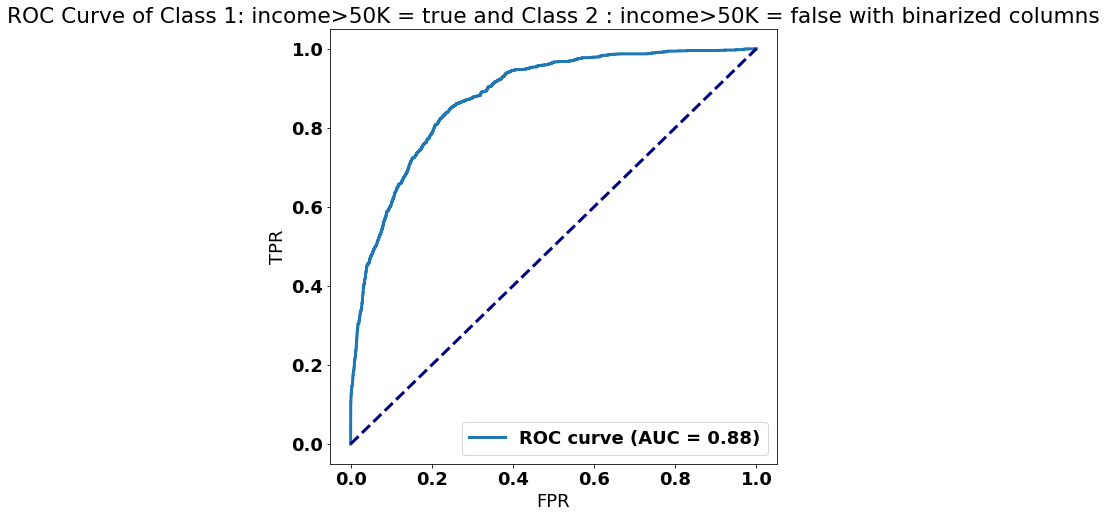


Use logistic regression to predict if the person is female from other variables in Adults with non-binarized columns

Confusion Matrix and Metrics of Class 1: Female = true and Class 2 : Female = false with non-binarized columns
Probability Threshold is chosen to be: 0.5
Confusion Matrix:
[[6135 1114]
 [1972 1633]]
TP, TN, FP, FN: 1633 , 6135 , 1114 , 1972
Accuracy rate: 0.72
Precision: 0.59
Recall: 0.45
F1 score: 0.51


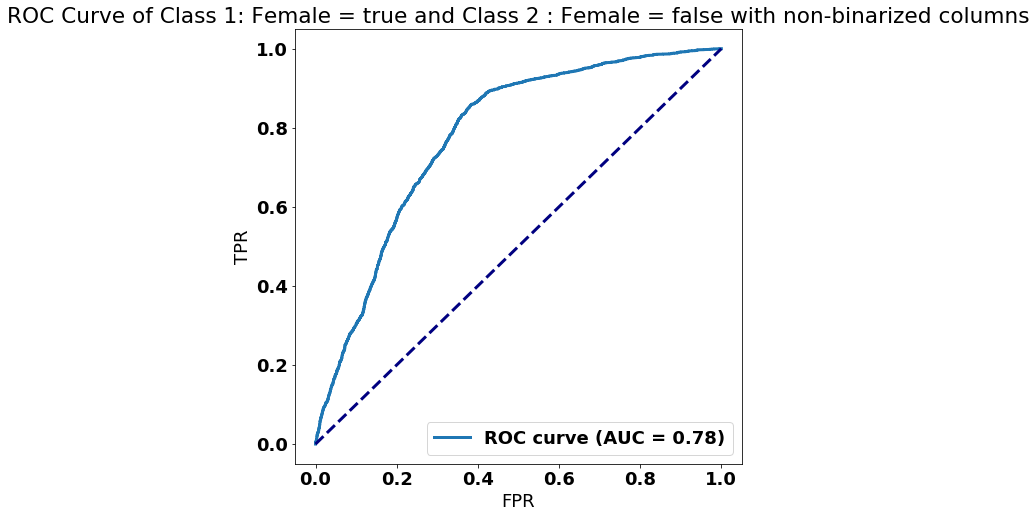

In [6]:
#Bin numeric values using Equal-width Binning
NB = 5 # number of bins

for col in ['age', 'hours-per-week']:
    # Replace missing values with Median for current column without Nan
    Adults.loc[:, col] = replace_missing_value(Adults, col)
    # To obtaining the boundaries of the bins
    bounds = np.linspace(np.min(Adults.loc[:, col]), np.max(Adults.loc[:, col]), NB + 1) 
    # Get the bin data
    bx = bin(Adults.loc[:, col].values, bounds)
    # Assign the binned variable into the new binarized column
    Adults.loc[:, col + '-bin'] = bx

# Replace missing values & outliers. Then Normalize numeric values using Z-Normalize
for col in ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']:
    # Replace missing values with Median for current column without Nan
    Adults.loc[:, col] = replace_missing_value(Adults, col)
    # Replace the outliers (if exists) by calling "replace_outlier" funtion
    Adults.loc[:, col] = replace_outlier(Adults.loc[:, col])
    # Coerce to numeric
    Adults.loc[:, col] = pd.to_numeric(Adults.loc[:, col], errors='coerce')
    X = pd.DataFrame(Adults.loc[:,col])
    # Normalization numeric data using Z-Normalize by scikit library
    standardization_scale = preprocessing.StandardScaler().fit(X)
    z = standardization_scale.transform(X)
    Adults.loc[:,col] = z
    
# Impute missing categories
# Trim string (some daata has ? with spaces)
Adults.replace('(^\s+|\s+$)', '', regex=True, inplace=True)
    
MissingValue = Adults.loc[:, "workclass"] == "?"
Adults.loc[MissingValue, "workclass"] = "Private"

MissingValue = Adults.loc[:, "occupation"] == "?"
Adults.loc[MissingValue, "occupation"] = "Other-service"

MissingValue = Adults.loc[:, "native-country"] == "?"
Adults.loc[MissingValue, "native-country"] = "Unknown"

# Categorical columns are consolidated
Adults.loc[ Adults.loc[:, "workclass"] == "Self-emp-not-inc", "workclass"] = "Private"
Adults.loc[ Adults.loc[:, "workclass"] == "Self-emp-inc", "workclass"] = "Private"
Adults.loc[ Adults.loc[:, "workclass"] == "Federal-gov", "workclass"] = "Government"
Adults.loc[ Adults.loc[:, "workclass"] == "Local-gov", "workclass"] = "Government"
Adults.loc[ Adults.loc[:, "workclass"] == "State-gov", "workclass"] = "Government"
Adults.loc[ Adults.loc[:, "workclass"] == "Without-pay", "workclass"] = "NoIncome"
Adults.loc[ Adults.loc[:, "workclass"] == "Never-worked", "workclass"] = "NoIncome"

Adults.loc[ Adults.loc[:, "marital-status"] == "Married-civ-spouse", "marital-status"] = "Couple"
Adults.loc[ Adults.loc[:, "marital-status"] == "Married-AF-spouse", "marital-status"] = "Couple"
Adults.loc[ Adults.loc[:, "marital-status"] == "Divorced", "marital-status"] = "Single"
Adults.loc[ Adults.loc[:, "marital-status"] == "Never-married", "marital-status"] = "Single"
Adults.loc[ Adults.loc[:, "marital-status"] == "Separated", "marital-status"] = "Single"
Adults.loc[ Adults.loc[:, "marital-status"] == "Widowed", "marital-status"] = "Single"
Adults.loc[ Adults.loc[:, "marital-status"] == "Married-spouse-absent", "marital-status"] = "Single"

Adults.loc[ Adults.loc[:, "occupation"] == "Tech-support", "occupation"] = "WhiteCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Sales", "occupation"] = "WhiteCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Exec-managerial", "occupation"] = "WhiteCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Prof-specialty", "occupation"] = "WhiteCollar"

Adults.loc[ Adults.loc[:, "occupation"] == "Craft-repair", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Other-service", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Handlers-cleaners", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Machine-op-inspct", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Adm-clerical", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Farming-fishing", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Transport-moving", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Priv-house-serv", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Protective-serv", "occupation"] = "BlueCollar"
Adults.loc[ Adults.loc[:, "occupation"] == "Armed-Forces", "occupation"] = "BlueCollar"

Adults.loc[ Adults.loc[:, "relationship"] == "Wife", "relationship"] = "Family"
Adults.loc[ Adults.loc[:, "relationship"] == "Own-child", "relationship"] = "Family"
Adults.loc[ Adults.loc[:, "relationship"] == "Husband", "relationship"] = "Family"

Adults.loc[ Adults.loc[:, "relationship"] == "Other-relative", "relationship"] = "Not-in-family"
Adults.loc[ Adults.loc[:, "relationship"] == "Unmarried", "relationship"] = "Not-in-family"

Adults.loc[ Adults.loc[:, "race"] == "Asian-Pac-Islander", "race"] = "NotWhite"
Adults.loc[ Adults.loc[:, "race"] == "Amer-Indian-Eskimo", "race"] = "NotWhite"
Adults.loc[ Adults.loc[:, "race"] == "Other", "race"] = "NotWhite"
Adults.loc[ Adults.loc[:, "race"] == "Black", "race"] = "NotWhite"

Adults.loc[ Adults.loc[:, "native-country"] == "Cambodia", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "India", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Japan", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "South", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "China", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Iran", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Philippines", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Vietnam", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Iran", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Laos", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Taiwan", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Thailand", "native-country"] = "Asia"
Adults.loc[ Adults.loc[:, "native-country"] == "Hong", "native-country"] = "Asia"

Adults.loc[ Adults.loc[:, "native-country"] == "United-States", "native-country"] = "NorthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Canada", "native-country"] = "NorthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Outlying-US(Guam-USVI-etc)", "native-country"] = "NorthAmerica"

Adults.loc[ Adults.loc[:, "native-country"] == "Puerto-Rico", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Cuba", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Honduras", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Jamaica", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Mexico", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Portugal", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Jamaica", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Dominican-Republic", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Ecuador", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Haiti", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Columbia", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Dominican-Republic", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Guatemala", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Nicaragua", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Guatemala", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "El-Salvador", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Trinadad&Tobago", "native-country"] = "SouthAmerica"
Adults.loc[ Adults.loc[:, "native-country"] == "Peru", "native-country"] = "SouthAmerica"

Adults.loc[ Adults.loc[:, "native-country"] == "England", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Germany", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Greece", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Italy", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Poland", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Greece", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Ireland", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "France", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Hungary", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Italy", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Poland", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Scotland", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Yugoslavia", "native-country"] = "Europe"
Adults.loc[ Adults.loc[:, "native-country"] == "Holand-Netherlands", "native-country"] = "Europe"

# One-hot encode categorical data
Adults.loc[:, "Female"] = (Adults.loc[:, "sex"] == "Female").astype(int)
Adults.loc[:, "Male"] = (Adults.loc[:, "sex"] == "Male").astype(int)
Adults.loc[:, "income<=50K"] = (Adults.loc[:, "income"] == "<=50K").astype(int)
Adults.loc[:, "income>50K"] = (Adults.loc[:, "income"] == ">50K").astype(int)
Adults.loc[:, "Private"] = (Adults.loc[:, "workclass"] == "Private").astype(int)
Adults.loc[:, "Government"] = (Adults.loc[:, "workclass"] == "Government").astype(int)
Adults.loc[:, "NoIncome"] = (Adults.loc[:, "workclass"] == "NoIncome").astype(int)
Adults.loc[:, "Couple"] = (Adults.loc[:, "marital-status"] == "Couple").astype(int)
Adults.loc[:, "Single"] = (Adults.loc[:, "marital-status"] == "Single").astype(int)
Adults.loc[:, "WhiteCollar"] = (Adults.loc[:, "occupation"] == "WhiteCollar").astype(int)
Adults.loc[:, "BlueCollar"] = (Adults.loc[:, "occupation"] == "BlueCollar").astype(int)
Adults.loc[:, "Family"] = (Adults.loc[:, "relationship"] == "Family").astype(int)
Adults.loc[:, "Not-in-family"] = (Adults.loc[:, "relationship"] == "Not-in-family").astype(int)
Adults.loc[:, "White"] = (Adults.loc[:, "race"] == "White").astype(int)
Adults.loc[:, "NotWhite"] = (Adults.loc[:, "race"] == "NotWhite").astype(int)
Adults.loc[:, "Asia"] = (Adults.loc[:, "native-country"] == "Asia").astype(int)
Adults.loc[:, "NorthAmerica"] = (Adults.loc[:, "native-country"] == "NorthAmerica").astype(int)
Adults.loc[:, "SouthAmerica"] = (Adults.loc[:, "native-country"] == "SouthAmerica").astype(int)
Adults.loc[:, "Europe"] = (Adults.loc[:, "native-country"] == "Europe").astype(int)

# Remove obsolete columns
Adults = Adults.drop("education", axis=1)
Adults = Adults.drop("sex", axis=1)
Adults = Adults.drop("income", axis=1)
Adults = Adults.drop("workclass", axis=1)
Adults = Adults.drop("marital-status", axis=1)
Adults = Adults.drop("occupation", axis=1)
Adults = Adults.drop("relationship", axis=1)
Adults = Adults.drop("race", axis=1)
Adults = Adults.drop("native-country", axis=1)
Adults = Adults.drop("income<=50K", axis=1)
Adults = Adults.drop("Male", axis=1) # Redundant since Female = 0 means Male
Adults = Adults.drop("Couple", axis=1) # Redundant since Couple = 0 means Single
Adults = Adults.drop("BlueCollar", axis=1) # Redundant since BlueCollar = 0 means WhiteCollar
Adults = Adults.drop("Family", axis=1) # Redundant since Family = 0 means Not-in-family
Adults = Adults.drop("NotWhite", axis=1) # Redundant since NotWhite = 0 means White

# Initialize parameters used in data analysis
print ('\nDetermine Model Accuracy')
TestFraction = 1/3 # ratio of test data over all data (ratio = 1/3 based on the specification from adult.name file)
C_parameter = 50. / len(Adults) # parameter for regularization of the model
class_parameter = 'ovr' # parameter for dealing with multiple classes
penalty_parameter = 'l1' # parameter for the optimizer (solver) in the function
solver_parameter = 'saga' # optimization system used
tolerance_parameter = 0.1 # termination parameter
binarizedColumns = ['age-bin', 'hours-per-week-bin'] # use to filter the columns from analysis
noneBinarizedColumns = ['age', 'hours-per-week'] # use to filter the columns from analysis

print ('\nsklearn accurate split:')
TrainSet, TestSet = train_test_split(Adults, test_size=TestFraction)
print ('Test size should have been ', 
       np.round(TestFraction*len(Adults), 0), "; and is: ", len(TestSet))

##########################################################################
# 1. Pick Class 1: income>50K = true (1), Class 0: income>50K = false (0)
# Target columns: income>50K
# Input columns: age, fnlwgt, education-num, capital-gain, capital-loss,
#                hours-per-week, Female, Private, Government, NoIncome
#                Single, WhiteCollar, Not-in-family, White, Asia, NorthAmerica
#                SouthAmerica, Europe
# Note: We use non-binarized columns (age, hours-per-week) to analyzied data
##########################################################################
print ('\nUse logistic regression to predict if the person make >50K per year from other variables in Adults with non-binarized columns')
Target = "income>50K"
Inputs = list(Adults.columns)
Inputs.remove(Target)
Inputs = [x for x in Inputs if x not in binarizedColumns]

clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(TrainSet.loc[:,Inputs], TrainSet.loc[:,Target])
BothProbabilities = clf.predict_proba(TestSet.loc[:,Inputs])
probabilities = BothProbabilities[:,1]

print ('\nConfusion Matrix and Metrics of Class 1: income>50K = true and Class 2 : income>50K = false with non-binarized columns')
Threshold = 0.5 # Some number between 0 and 1
print ("Probability Threshold is chosen to be:", Threshold)
predictions = (probabilities > Threshold).astype(int)
CM = confusion_matrix(TestSet.loc[:,Target], predictions)
print("Confusion Matrix:")
print("{}".format(CM))
tn, fp, fn, tp = CM.ravel()
print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(TestSet.loc[:,Target], predictions)
print ("Accuracy rate:", np.round(AR, 2))
P = precision_score(TestSet.loc[:,Target], predictions)
print ("Precision:", np.round(P, 2))
R = recall_score(TestSet.loc[:,Target], predictions)
print ("Recall:", np.round(R, 2))
F1 = f1_score(TestSet.loc[:,Target], predictions)
print ("F1 score:", np.round(F1, 2))

 # False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = roc_curve(TestSet.loc[:,Target], probabilities)
AUC = auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'family' : 'Sans', 'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('ROC Curve of Class 1: income>50K = true and Class 2 : income>50K = false with non-binnarized columns')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

##########################################################################
# 2. Pick Class 1: income>50K = true (1), Class 0: income>50K = false (0)
# Target columns: income>50K
# Input columns: age-bin, fnlwgt, education-num, capital-gain, capital-loss,
#                hours-per-week-bin, Female, Private, Government, NoIncome
#                Single, WhiteCollar, Not-in-family, White, Asia, NorthAmerica
#                SouthAmerica, Europe
# Assumption: using binarized columns should make the accuray decrease since we lost of data's frequencies
# Note: We use binarized columns (age-bin, hours-per-week-bin) to analyzied data
##########################################################################
print ('\nUse logistic regression to predict if the person make >50K per year from other variables in Adults with binarized columns')
Target = "income>50K"
Inputs = list(Adults.columns)
Inputs.remove(Target)
Inputs = [x for x in Inputs if x not in noneBinarizedColumns]

clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(TrainSet.loc[:,Inputs], TrainSet.loc[:,Target])
BothProbabilities = clf.predict_proba(TestSet.loc[:,Inputs])
probabilities = BothProbabilities[:,1]

print ('\nConfusion Matrix and Metrics of Class 1: income>50K = true and Class 2 : income>50K = false with binarized columns')
Threshold = 0.5 # Some number between 0 and 1
print ("Probability Threshold is chosen to be:", Threshold)
predictions = (probabilities > Threshold).astype(int)
CM = confusion_matrix(TestSet.loc[:,Target], predictions)
print("Confusion Matrix:")
print("{}".format(CM))
tn, fp, fn, tp = CM.ravel()
print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(TestSet.loc[:,Target], predictions)
print ("Accuracy rate:", np.round(AR, 2))
P = precision_score(TestSet.loc[:,Target], predictions)
print ("Precision:", np.round(P, 2))
R = recall_score(TestSet.loc[:,Target], predictions)
print ("Recall:", np.round(R, 2))
F1 = f1_score(TestSet.loc[:,Target], predictions)
print ("F1 score:", np.round(F1, 2))

 # False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = roc_curve(TestSet.loc[:,Target], probabilities)
AUC = auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'family' : 'Sans', 'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('ROC Curve of Class 1: income>50K = true and Class 2 : income>50K = false with binarized columns')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

##########################################################################
# 3. Pick Class 1: Female = true (1), Class 0: Female = false (0)
# Target columns: Female
# Input columns: age, fnlwgt, education-num, capital-gain, capital-loss,
#                hours-per-week, Female, Private, Government, NoIncome
#                Single, WhiteCollar, Not-in-family, White, Asia, NorthAmerica
#                SouthAmerica, Europe
# Note: We use non-binarized columns (age, hours-per-week) to analyzied data
##########################################################################
print ('\nUse logistic regression to predict if the person is female from other variables in Adults with non-binarized columns')
Target = "Female"
Inputs = list(Adults.columns)
Inputs.remove(Target)
Inputs = [x for x in Inputs if x not in binarizedColumns]

clf = LogisticRegression(C=C_parameter, multi_class=class_parameter, penalty=penalty_parameter, solver=solver_parameter, tol=tolerance_parameter)
clf.fit(TrainSet.loc[:,Inputs], TrainSet.loc[:,Target])
BothProbabilities = clf.predict_proba(TestSet.loc[:,Inputs])
probabilities = BothProbabilities[:,1]

print ('\nConfusion Matrix and Metrics of Class 1: Female = true and Class 2 : Female = false with non-binarized columns')
Threshold = 0.5 # Some number between 0 and 1
print ("Probability Threshold is chosen to be:", Threshold)
predictions = (probabilities > Threshold).astype(int)
CM = confusion_matrix(TestSet.loc[:,Target], predictions)
print("Confusion Matrix:")
print("{}".format(CM))
tn, fp, fn, tp = CM.ravel()
print ("TP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
AR = accuracy_score(TestSet.loc[:,Target], predictions)
print ("Accuracy rate:", np.round(AR, 2))
P = precision_score(TestSet.loc[:,Target], predictions)
print ("Precision:", np.round(P, 2))
R = recall_score(TestSet.loc[:,Target], predictions)
print ("Recall:", np.round(R, 2))
F1 = f1_score(TestSet.loc[:,Target], predictions)
print ("F1 score:", np.round(F1, 2))

 # False Positive Rate, True Posisive Rate, probability thresholds
fpr, tpr, th = roc_curve(TestSet.loc[:,Target], probabilities)
AUC = auc(fpr, tpr)

plt.rcParams["figure.figsize"] = [8, 8] # Square
font = {'family' : 'Sans', 'weight' : 'bold', 'size' : 18}
matplotlib.rc('font', **font)
plt.figure()
plt.title('ROC Curve of Class 1: Female = true and Class 2 : Female = false with non-binarized columns')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot(fpr, tpr, LW=3, label='ROC curve (AUC = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', LW=3, linestyle='--') # reference line for random classifier
plt.legend(loc="lower right")
plt.show()

***
**Summary:** 
The classification that we interested are:
1. if the person make >50K per year (income>50K)
2. if the person is female (Female)

    - Based on the Probability Threshold 0.5
    - From the Sample of 32,561
    - We split the data to Train (21,707) and Test (10,854) using scikit learn package
    - From model, the Classifier: income>50K yeild better AUC (0.89) than Classifier: Female (0.77)
    - This model does quite a good job of distinguishing the positive and the negative values since the AUC = 0.89 which is large
    - Therefore, the logistic regression seems to fit for prediction if the person make >50K per year
    - The performance of the Classifier: income>50K changes a bit (from AUC = 0.89 to AUC = 0.88) when using binarized columns as the initial assumption
***